
🔹 Feature Impact Analysis:
            Feature  Coefficient
0   YearsExperience  7079.886923
1    EducationLevel  -510.679510
2  WorkHoursPerWeek   -82.504450

📌 Feature Interpretation:
🔼 YearsExperience: A 1-unit increase in YearsExperience increases Salary by $7079.89.
🔽 EducationLevel: A 1-unit increase in EducationLevel decreases Salary by $-510.68.
🔽 WorkHoursPerWeek: A 1-unit increase in WorkHoursPerWeek decreases Salary by $-82.50.


C:\Users\hameh\AppData\Local\Temp\ipykernel_10364\3911520648.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Coefficient"], y=feature_importance["Feature"], palette="coolwarm")


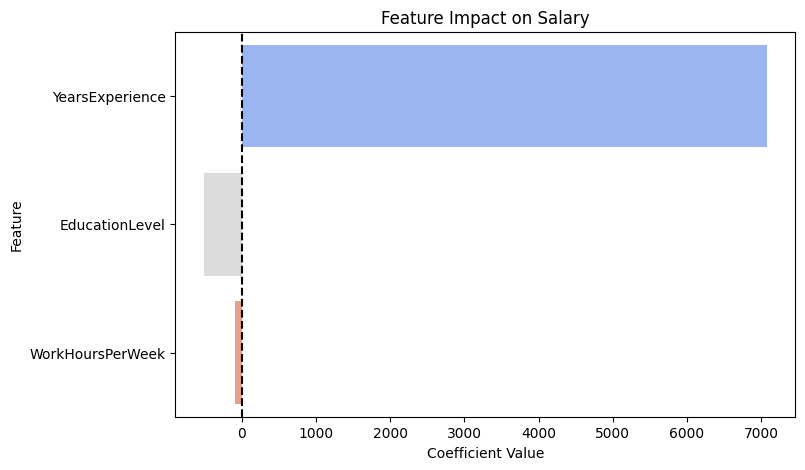

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Load Dataset (Same as Task 3 & 4)
data = {
    "YearsExperience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "EducationLevel": [12, 14, 16, 12, 16, 18, 14, 16, 18, 20],  # Education in years
    "WorkHoursPerWeek": [35, 40, 45, 50, 55, 60, 50, 45, 40, 35],  # Work hours per week
    "Salary": [40000, 45000, 50000, 60000, 65000, 70000, 80000, 85000, 95000, 100000]
}

df = pd.DataFrame(data)

# Define Features (X) and Target (y)
X = df[["YearsExperience", "EducationLevel", "WorkHoursPerWeek"]]
y = df["Salary"]

# Split into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get Coefficients (Feature Importance)
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})

# Print Feature Impact
print("\n🔹 Feature Impact Analysis:")
print(feature_importance)

# Step 3: Interpret Feature Impact
print("\n📌 Feature Interpretation:")
for feature, coef in zip(X.columns, model.coef_):
    if coef > 0:
        print(f"🔼 {feature}: A 1-unit increase in {feature} increases Salary by ${coef:.2f}.")
    else:
        print(f"🔽 {feature}: A 1-unit increase in {feature} decreases Salary by ${coef:.2f}.")

# Step 4: Visualizing Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance["Coefficient"], y=feature_importance["Feature"], palette="coolwarm")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Impact on Salary")
plt.axvline(0, color="black", linestyle="dashed")  # Show neutral impact
plt.show()
